In [2]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [1]:
# easiest model
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
            ['this', 'is', 'the', 'second', 'sentence'],
            ['yet', 'another', 'sentence'],
            ['one', 'more', 'sentence'],
            ['and', 'the', 'final', 'sentence']]
# train model
model_1 = Word2Vec(sentences, size=300, min_count=1)

# fit a 2d PCA model to the vectors
X = model_1[model_1.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model_1.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

C:\Users\abisht\AppData\Local\Continuum\anaconda3_1\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


<Figure size 640x480 with 1 Axes>

In [3]:
df = pd.read_excel(r'C:\Users\abisht\Documents\datasets\Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.head()
df.shape
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()
df.shape

(406829, 8)

In [14]:
df.info()

df['StockCode']= df['StockCode'].astype(str)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [16]:
df.info()
customers = df["CustomerID"].unique().tolist()
len(customers)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


4372

In [17]:

# shuffle customer ID's
random.shuffle(customers)

# extract 90% of customer ID's
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]

# split data into train and validation set
train_df = df[df['CustomerID'].isin(customers_train)]
validation_df = df[~df['CustomerID'].isin(customers_train)]

In [18]:
# list to capture purchase history of the customers
purchases_train = []

# populate the list with the product codes
for i in tqdm(customers_train):
    temp = train_df[train_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)
    
purchases_train[0]

100%|█████████████████████████████████████████████████████████████████████████████| 3935/3935 [00:05<00:00, 769.32it/s]


In [23]:
# list to capture purchase history of the customers
purchases_val = []

# populate the list with the product codes
for i in tqdm(validation_df['CustomerID'].unique()):
    temp = validation_df[validation_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_val.append(temp)
    
purchases_val[0]

100%|███████████████████████████████████████████████████████████████████████████████| 437/437 [00:00<00:00, 943.29it/s]


['22728',
 '22727',
 '22726',
 '21724',
 '21883',
 '10002',
 '21791',
 '21035',
 '22326',
 '22629',
 '22659',
 '22631',
 '22661',
 '21731',
 '22900',
 '21913',
 '22540',
 '22544',
 '22492',
 'POST',
 '21086',
 '21080',
 '22726',
 '22727',
 '22728',
 '22729',
 '21121',
 '22326',
 '20750',
 '22551',
 '22556',
 '22555',
 '21731',
 '22390',
 '22333',
 '22331',
 '20719',
 '21883',
 '21042',
 '22367',
 '21094',
 'POST',
 '22540',
 '22539',
 '22556',
 '22554',
 '22551',
 '21981',
 '22615',
 '22616',
 '22614',
 '16218',
 '22326',
 '22492',
 'POST',
 'POST',
 '23007',
 '23010',
 '21559',
 '21042',
 '21080',
 '21086',
 '21094',
 '21240',
 '21731',
 '22333',
 '22331',
 '22556',
 '22554',
 '22729',
 '22197',
 '22090',
 '22492',
 'POST',
 '22991',
 '23009',
 '23280',
 '23281',
 '22556',
 '22492',
 '22434',
 '21240',
 '21238',
 '22090',
 '22729',
 '20724',
 '20719',
 '21039',
 '21121',
 '21212',
 '21154',
 '20983',
 '20981',
 '21245',
 '84380',
 'POST',
 '23100',
 '21240',
 '21238',
 '21244',
 '2124

In [24]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(3532274, 3571150)

In [25]:
print(model)

Word2Vec(vocab=3158, size=100, alpha=0.03)


In [26]:
# extract all vectors
X = model[model.wv.vocab]

X.shape

(3158, 100)

In [39]:
import umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

AttributeError: module 'umap' has no attribute 'UMAP'

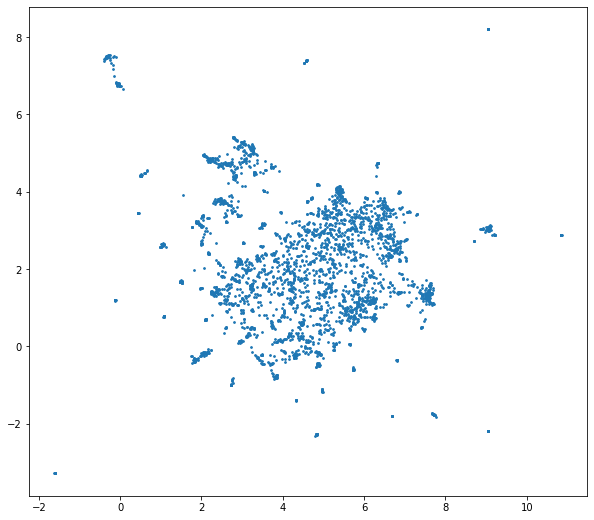

In [42]:
import umap.umap_ as umap

cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)
plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral')

In [43]:
products = train_df[["StockCode", "Description"]]

# remove duplicates
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")

# create product-ID and product-description dictionary
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [45]:
products_dict
products_dict['84029E']

['RED WOOLLY HOTTIE WHITE HEART.']

In [46]:
def similar_products(v, n = 6):
    
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms        

In [47]:
similar_products(model['90019A'])

[('SILVER M.O.P ORBIT DROP EARRINGS', 0.7969570159912109),
 ('AMBER DROP EARRINGS W LONG BEADS', 0.7723140716552734),
 ('BLUE MURANO TWIST BRACELET', 0.7681650519371033),
 ('ANT COPPER RED BOUDICCA BRACELET', 0.7582828402519226),
 ('JADE DROP EARRINGS W FILIGREE', 0.7416688203811646),
 ('GOLD/M.O.P PENDANT ORBIT NECKLACE', 0.7352064847946167)]

In [48]:
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [49]:
len(purchases_val[0])

251

In [52]:
aggregate_vectors(purchases_val[0]).shape

[['22728',
  '22727',
  '22726',
  '21724',
  '21883',
  '10002',
  '21791',
  '21035',
  '22326',
  '22629',
  '22659',
  '22631',
  '22661',
  '21731',
  '22900',
  '21913',
  '22540',
  '22544',
  '22492',
  'POST',
  '21086',
  '21080',
  '22726',
  '22727',
  '22728',
  '22729',
  '21121',
  '22326',
  '20750',
  '22551',
  '22556',
  '22555',
  '21731',
  '22390',
  '22333',
  '22331',
  '20719',
  '21883',
  '21042',
  '22367',
  '21094',
  'POST',
  '22540',
  '22539',
  '22556',
  '22554',
  '22551',
  '21981',
  '22615',
  '22616',
  '22614',
  '16218',
  '22326',
  '22492',
  'POST',
  'POST',
  '23007',
  '23010',
  '21559',
  '21042',
  '21080',
  '21086',
  '21094',
  '21240',
  '21731',
  '22333',
  '22331',
  '22556',
  '22554',
  '22729',
  '22197',
  '22090',
  '22492',
  'POST',
  '22991',
  '23009',
  '23280',
  '23281',
  '22556',
  '22492',
  '22434',
  '21240',
  '21238',
  '22090',
  '22729',
  '20724',
  '20719',
  '21039',
  '21121',
  '21212',
  '21154',
  '2

In [53]:
# Similar products based on user purchase history
similar_products(aggregate_vectors(purchases_val[0]))

[('ROUND SNACK BOXES SET OF4 WOODLAND ', 0.6984640955924988),
 ('SET/6 RED SPOTTY PAPER PLATES', 0.6933899521827698),
 ('PLASTERS IN TIN SPACEBOY', 0.691389262676239),
 ('ROUND SNACK BOXES SET OF 4 FRUITS ', 0.6841267347335815),
 ('SPACEBOY LUNCH BOX ', 0.6785964965820312),
 ('RED TOADSTOOL LED NIGHT LIGHT', 0.675986647605896)]

In [54]:
# top 10 recommended products based on purchase history
similar_products(aggregate_vectors(purchases_val[0][-10:]))

[('POSTAGE', 0.7211804389953613),
 ('ROUND SNACK BOXES SET OF 4 FRUITS ', 0.7169092893600464),
 ('LUNCH BOX WITH CUTLERY RETROSPOT ', 0.7105090618133545),
 ('STRAWBERRY LUNCH BOX WITH CUTLERY', 0.7061142921447754),
 ('CHILDRENS APRON SPACEBOY DESIGN', 0.695349931716919),
 ('SPACEBOY LUNCH BOX ', 0.6747434139251709)]